# Part 1: Working with Regex

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import re

In [3]:
pattern = r"\d{10}"
text_to_search = "Hello my name is sebastien, you can call me on 0664533519. See you!"
re.findall(pattern, text_to_search)

['0664533519']

In [ ]:
# Zip code pattern
zip_code_pattern = r"\d{5}"
text_to_search = "I moved to Paris 75011, it's closer to my workplace."
re.findall(zip_code_pattern, text_to_search)


In [8]:
# Date pattern
date_pattern = r"\d{2}-\d{2}-\d{4}"
text_to_search = "Receipt Number 103402 ||| 15-02-2017"
re.findall(date_pattern, text_to_search)

['15-02-2017']

In [21]:
# Quantity pattern 
quantity_pattern = r"Quantity +\d+"
text_to_search = """Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €
====================================
************************************
Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €
====================================
************************************
Receipt Number 103086 ||| 23-01-2017 
------------------------------------

Quantity                         156
Total Amount               2808.00 €
====================================
************************************"""
re.findall(quantity_pattern, text_to_search)

['Quantity                         163',
 'Quantity                         110',
 'Quantity                         156']

In [15]:
#Amount Pattern
amount_pattern = r"Total Amount +\d+.{5}"
re.findall(amount_pattern, text_to_search)

['Total Amount               3097.00 €',
 'Total Amount                935.00 €',
 'Total Amount               2808.00 €']

In [23]:
# quantity_group_pattern
quantity_group_pattern = r"Quantity +(\d+)"
re.findall(quantity_group_pattern, text_to_search)

['163', '110', '156']

In [27]:
#Amount group Pattern
amount_group_pattern = r"Total Amount +(\d+.{3}).{2}"
re.findall(amount_group_pattern, text_to_search)

['3097.00', '935.00', '2808.00']

['103402']

In [28]:
from nbresult import ChallengeResult

result = ChallengeResult('patterns',
    zipcode_re=zip_code_pattern,
    date_re=date_pattern,
    quantity_re=quantity_pattern,
                         
    amount_re=amount_pattern,
    quantity_grp_re=quantity_group_pattern,
    amount_grp_re=amount_group_pattern
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.9.8, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/josephgulay/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/josephgulay/code/roadbusta/data-challenges-recap/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-3.4.0
collecting ... collected 6 items

tests/test_patterns.py::TestPatterns::test_amount_group_pattern PASSED   [ 16%]
tests/test_patterns.py::TestPatterns::test_amount_pattern PASSED         [ 33%]
tests/test_patterns.py::TestPatterns::test_date_pattern PASSED           [ 50%]
tests/test_patterns.py::TestPatterns::test_quantity_group_pattern PASSED [ 66%]
tests/test_patterns.py::TestPatterns::test_quantity_pattern PASSED       [ 83%]
tests/test_patterns.py::TestPatterns::test_zip_code_pattern PASSED       [100%]

============================== 6 passed in 0.09s ===============================


💯 You can commit yo

# Part 2: From a text file to a DataFrame

In [29]:
# Read the reciept text file
filepath = "data/receipts.txt"
with open(filepath, encoding="utf-8") as f:
    receipts_str = f.read()


In [30]:
print(receipts_str[:500])




Receipt Number 102790 ||| 02-01-2017 
------------------------------------

Quantity                         163
Total Amount               3097.00 €

************************************


Receipt Number 102862 ||| 05-01-2017 
------------------------------------

Quantity                         110
Total Amount                935.00 €

************************************


Receipt Number 103086 ||| 23-01-2017 
-----


In [70]:
#Create a list with the receipts
receipts_list = receipts_str.split("""====================================
************************************""")


In [71]:
#Prepare a dictionary receipts_dict where we will save our data

receipts_dict = {
    "date": [],
    "quantity": [],
    "amount": []
}

In [72]:
for reciept in receipts_list:
    date = re.findall(date_pattern, reciept)[0]
    quantity = re.findall(quantity_group_pattern, reciept)[0]
    amount = re.findall(amount_group_pattern, reciept)[0]
    receipts_dict['date'].append(date)
    receipts_dict['quantity'].append(quantity)
    receipts_dict['amount'].append(amount)
#     print(f"date: {date}, amount: {amount}, quantity: {quantity}")

reciepts_dict

{'date': ['02-01-2017',
  '05-01-2017',
  '23-01-2017',
  '31-01-2017',
  '06-02-2017',
  '15-02-2017',
  '16-02-2017',
  '17-02-2017',
  '21-02-2017',
  '27-02-2017',
  '28-02-2017',
  '01-03-2017',
  '08-03-2017',
  '09-03-2017',
  '17-03-2017',
  '21-03-2017',
  '21-03-2017',
  '22-03-2017',
  '22-03-2017',
  '27-03-2017',
  '31-03-2017',
  '07-04-2017',
  '11-04-2017',
  '14-04-2017',
  '17-04-2017',
  '18-04-2017',
  '19-04-2017',
  '20-04-2017',
  '24-04-2017',
  '02-05-2017',
  '05-05-2017',
  '12-05-2017',
  '15-05-2017',
  '15-05-2017',
  '17-05-2017',
  '18-05-2017',
  '19-05-2017',
  '22-05-2017',
  '24-05-2017',
  '30-05-2017',
  '02-06-2017',
  '12-06-2017',
  '14-06-2017',
  '15-06-2017',
  '16-06-2017',
  '19-06-2017',
  '19-06-2017',
  '30-06-2017',
  '03-07-2017',
  '04-07-2017',
  '05-07-2017',
  '05-07-2017',
  '07-07-2017',
  '11-07-2017',
  '11-07-2017',
  '13-07-2017',
  '13-07-2017',
  '19-07-2017',
  '20-07-2017',
  '21-07-2017',
  '24-07-2017',
  '25-07-2017',


In [84]:
receipts_df = pd.DataFrame.from_dict(receipts_dict)
receipts_df



,date,quantity,amount
0,02-01-2017,163,3097.00
1,05-01-2017,110,935.00
2,23-01-2017,156,2808.00
3,31-01-2017,182,4368.00
4,06-02-2017,97,1988.50
...,...,...,...
95,09-10-2017,121,1936.00
96,12-10-2017,179,4743.50
97,26-10-2017,108,2484.00
98,12-12-2017,193,2605.50


In [74]:
from nbresult import ChallengeResult

result = ChallengeResult('receipts',
    raw=receipts_list,
    receipts=receipts_dict,
    df_size=receipts_df.shape,
    receipt=receipts_df.iloc[-1, :]
)
result.write()
print(result.check())

============================= test session starts ==============================
platform darwin -- Python 3.9.8, pytest-6.2.5, py-1.11.0, pluggy-1.0.0 -- /Users/josephgulay/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/josephgulay/code/roadbusta/data-challenges-recap/02-Data-Toolkit/02-Data-Sourcing/03-Text-Extraction-with-Regex
plugins: anyio-3.4.0
collecting ... collected 4 items

tests/test_receipts.py::TestReceipts::test_receipt PASSED                [ 25%]
tests/test_receipts.py::TestReceipts::test_receipts_df_size PASSED       [ 50%]
tests/test_receipts.py::TestReceipts::test_receipts_dict PASSED          [ 75%]
tests/test_receipts.py::TestReceipts::test_receipts_list PASSED          [100%]

============================== 4 passed in 1.12s ===============================


💯 You can commit your code:

git add tests/receipts.pickle

git commit -m 'Completed receipts step'

git push origin master


# Part 3: Data Visualization

In [86]:
#Replace date string with a datetime object

receipts_df['date'] = pd.to_datetime(receipts_df['date'])


In [88]:
receipts_df.set_index('date', inplace = True)


0                                     2017-02-01 00:00:00
1                                     2017-05-01 00:00:00
2                                     2017-01-23 00:00:00
3                                     2017-01-31 00:00:00
4                                     2017-06-02 00:00:00
                              ...                        
96                                    2017-12-10 00:00:00
97                                    2017-10-26 00:00:00
98                                    2017-12-12 00:00:00
99                                    2017-12-15 00:00:00
date    0    2017-02-01
1    2017-05-01
2    2017-01-2...
Name: date, Length: 101, dtype: object

In [90]:
receipts_df.sort_index(inplace = True)


,quantity,amount
date,,
2017-01-03,105,2835.00
2017-01-08,199,4875.50
2017-01-23,156,2808.00
2017-01-31,182,4368.00
2017-02-01,163,3097.00
...,...,...
2017-12-05,97,1891.50
2017-12-06,173,3373.50
2017-12-10,179,4743.50


In [92]:
#Change to numeric data types
receipts_df['quantity'] = pd.to_numeric(receipts_df['quantity'])
receipts_df['amount'] = pd.to_numeric(receipts_df['amount'])
receipts_df

,quantity,amount
date,,
2017-01-03,105,2835.0
2017-01-08,199,4875.5
2017-01-23,156,2808.0
2017-01-31,182,4368.0
2017-02-01,163,3097.0
...,...,...
2017-12-05,97,1891.5
2017-12-06,173,3373.5
2017-12-10,179,4743.5


<AxesSubplot:xlabel='date'>

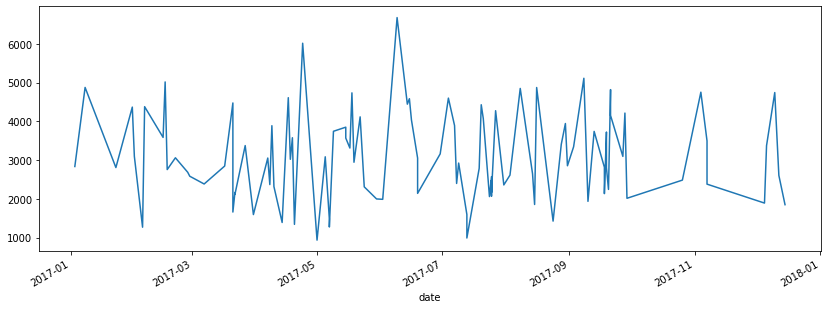

In [99]:
receipts_df['amount'].plot(figsize = (14,5))